# General Overview

In [1]:
#Import Dependencies
import pandas as pd
import hvplot.pandas
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import pyplot
import seaborn as sns

In [2]:
#Read CSV
df_diabetes = pd.read_csv('Resources/Diabetes Binary Health Indicators.csv')
df_diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
#Set conditions
df_diabetes = df_diabetes.loc[(df_diabetes["HeartDiseaseorAttack"] == 0.0) & 
                              (df_diabetes["NoDocbcCost"] == 0.0) & 
                              (df_diabetes["DiffWalk"] == 0.0) & 
                              (df_diabetes["CholCheck"] == 1.0) & 
                              (df_diabetes["AnyHealthcare"] == 1.0) &
                              (df_diabetes["Smoker"] == 0.0) &
                              (df_diabetes["Stroke"] == 0.0)
                             ]
df_diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
11,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
12,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0


In [4]:
#Filter out series
df_diabetes = df_diabetes[["Diabetes_binary", "HighBP", "HighChol", "BMI", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "Sex", "Age", "Income"]]
df_diabetes.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace = True)
df_diabetes.head()

,Diabetes,HighBP,HighChol,BMI,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Income
0,0.0,1.0,0.0,26.0,1.0,0.0,1.0,0.0,1.0,4.0,8.0
2,0.0,0.0,0.0,26.0,1.0,1.0,1.0,0.0,1.0,13.0,8.0
8,0.0,0.0,0.0,32.0,1.0,1.0,1.0,0.0,0.0,3.0,8.0
11,0.0,0.0,0.0,21.0,1.0,1.0,1.0,0.0,1.0,4.0,8.0
12,0.0,1.0,1.0,27.0,1.0,1.0,1.0,0.0,1.0,7.0,8.0


In [5]:
#Finding the average responses based off having vs not having diabetes
df_avg = df_diabetes.groupby("Diabetes").mean()
df_avg

,HighBP,HighChol,BMI,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Income
Diabetes,,,,,,,,,,
0.0,0.299569,0.328226,27.316683,0.847828,0.686633,0.847297,0.040862,0.405771,7.300829,6.721857
1.0,0.683728,0.599002,31.066736,0.750580,0.624768,0.783774,0.014044,0.444638,9.011142,6.027159


In [6]:
#Finding the average responses based off having vs not having High Cholesterol
df_chol = df_diabetes.groupby("HighChol").mean()
df_chol

,Diabetes,HighBP,BMI,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Income
HighChol,,,,,,,,,,
0.0,0.254381,0.316301,28.026874,0.833751,0.680386,0.836254,0.033868,0.413488,7.285893,6.568915
1.0,0.510535,0.604511,29.558710,0.783856,0.642299,0.807993,0.027401,0.428529,8.778613,6.335246


In [7]:
#Finding the average responses based off having vs not having High Blood Pressure
df_bp = df_diabetes.groupby("HighBP").mean()
df_bp

,Diabetes,HighChol,BMI,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Income
HighBP,,,,,,,,,,
0.0,0.205134,0.300964,27.275821,0.851626,0.680593,0.843044,0.035908,0.406805,7.004893,6.715372
1.0,0.566061,0.587201,30.473527,0.762468,0.643125,0.800135,0.024983,0.436629,9.094552,6.154992


In [8]:
#Rename responses for clarity
df_diabetes["Diabetes"].replace({1.0 : 'Positive', 0.0 : 'Negative'}, inplace = True)
df_diabetes["Sex"].replace({1.0 : 'Male', 0.0 : 'Female'}, inplace = True)
df_diabetes.head()

,Diabetes,HighBP,HighChol,BMI,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Income
0,Negative,1.0,0.0,26.0,1.0,0.0,1.0,0.0,Male,4.0,8.0
2,Negative,0.0,0.0,26.0,1.0,1.0,1.0,0.0,Male,13.0,8.0
8,Negative,0.0,0.0,32.0,1.0,1.0,1.0,0.0,Female,3.0,8.0
11,Negative,0.0,0.0,21.0,1.0,1.0,1.0,0.0,Male,4.0,8.0
12,Negative,1.0,1.0,27.0,1.0,1.0,1.0,0.0,Male,7.0,8.0


In [9]:
#Create new dataframes for male and female
df_male = df_diabetes[df_diabetes["Sex"] == "Male"]
df_female = df_diabetes[df_diabetes["Sex"] == "Female"]
df_male.head()

,Diabetes,HighBP,HighChol,BMI,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Income
0,Negative,1.0,0.0,26.0,1.0,0.0,1.0,0.0,Male,4.0,8.0
2,Negative,0.0,0.0,26.0,1.0,1.0,1.0,0.0,Male,13.0,8.0
11,Negative,0.0,0.0,21.0,1.0,1.0,1.0,0.0,Male,4.0,8.0
12,Negative,1.0,1.0,27.0,1.0,1.0,1.0,0.0,Male,7.0,8.0
13,Negative,1.0,0.0,58.0,0.0,1.0,1.0,0.0,Male,10.0,6.0


# Cholesterol Analysis

In [51]:
#Calculate total number of people with high cholesterol
df_high_chol = df_diabetes.loc[(df_diabetes["HighChol"] == 1.0)]
print('The total number of people with high cholesterol is ' + str(len(df_high_chol)))
chol_pct = round(((len(df_high_chol)/len(df_diabetes)) * 100), 2)
print('That means ' + str(chol_pct) + '% of the population of the survey has high cholesterol')

The total number of people with high cholesterol is 10109
That means 42.67% of the population of the survey has high cholesterol


In [11]:
#Calculate total number of people with high cholesterol by sex
df_high_cholesterol = df_diabetes.loc[(df_diabetes["HighChol"] == 1.0)]
sex_counts = df_high_cholesterol['Sex'].value_counts()
df_chol_sex = sex_counts.reset_index()
df_chol_sex.columns = ['Sex', 'People With High Chol']
df_chol_sex                               

,Sex,People With High Chol
0,Female,5777
1,Male,4332


In [12]:
#Calculate the frequency of High Cholesterol based off diabetes diagnosis
hc_mean = df_diabetes.groupby("Diabetes")["HighChol"].mean().reset_index()
hc_mean

,Diabetes,HighChol
0,Negative,0.328226
1,Positive,0.599002


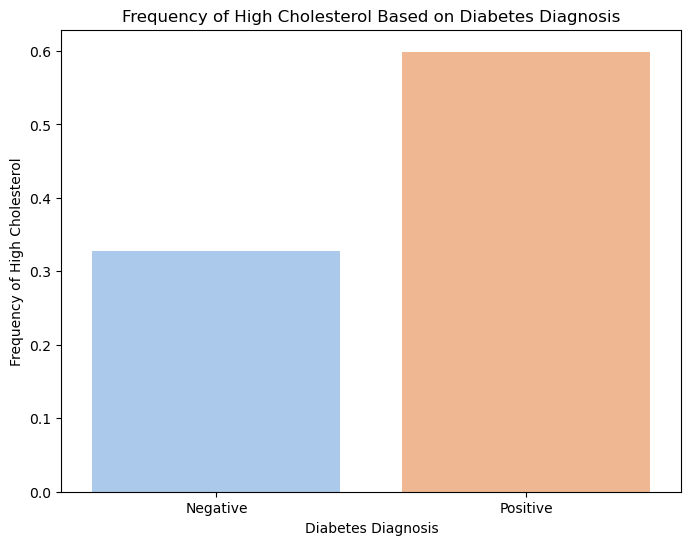

In [48]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes', y='HighChol', data=hc_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency of High Cholesterol')
plt.title('Frequency of High Cholesterol Based on Diabetes Diagnosis')

# Display the chart
plt.show()

In [14]:
#Calculate which sex has a higher frequency of High Cholesterol
df_hc = df_diabetes.groupby("Sex")["HighChol"].mean().reset_index()
df_hc.columns = ['Sex', 'Percentage of People With High Chol']
df_hc

,Sex,Percentage of People With High Chol
0,Female,0.420359
1,Male,0.435464


In [15]:
#Calculate the frequency of High Cholesterol in Females based off diabetes diagnosis
female_hc_mean = df_female.groupby('Diabetes')['HighChol'].mean().reset_index()
print('Frequency of High Cholesterol in Females') 
female_hc_mean

Frequency of High Cholesterol in Females


,Diabetes,HighChol
0,Negative,0.317147
1,Positive,0.613584


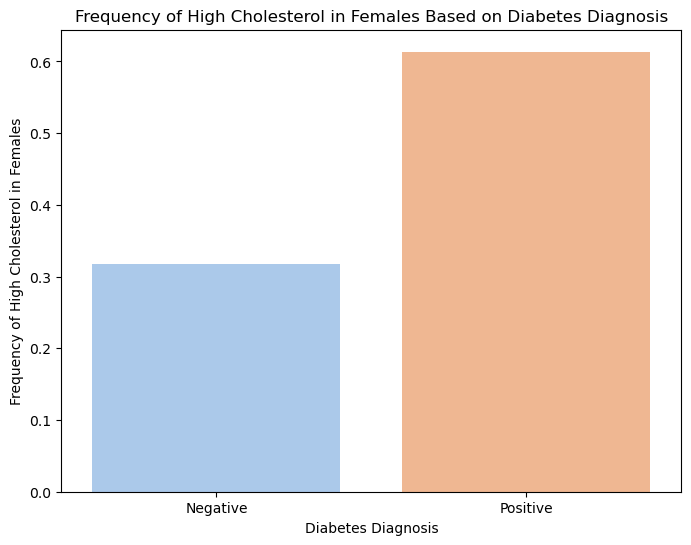

In [52]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes', y='HighChol', data=female_hc_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency of High Cholesterol in Females')
plt.title('Frequency of High Cholesterol in Females Based on Diabetes Diagnosis')

# Display the chart
plt.show()

In [17]:
#Calculate the frequency of High Cholesterol in Males based off diabetes diagnosis
Male_hc_mean = df_male.groupby('Diabetes')['HighChol'].mean().reset_index()
print('Frequency of High Cholesterol in Males') 
Male_hc_mean

Frequency of High Cholesterol in Males


,Diabetes,HighChol
0,Negative,0.344450
1,Positive,0.580788


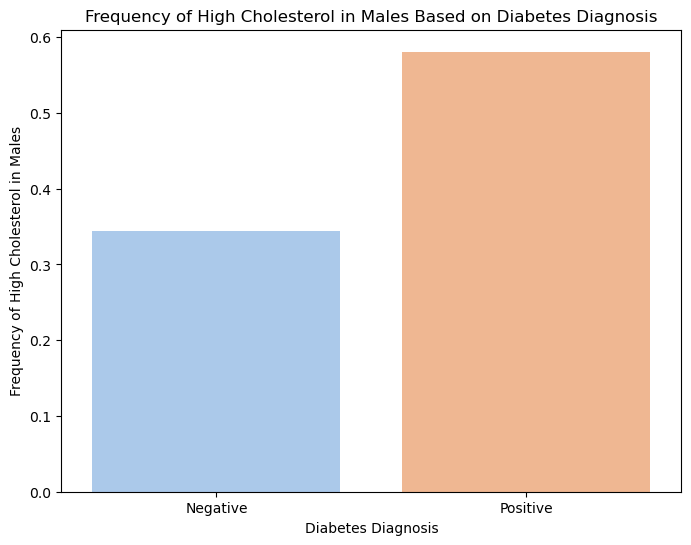

In [53]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes', y='HighChol', data=Male_hc_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency of High Cholesterol in Males')
plt.title('Frequency of High Cholesterol in Males Based on Diabetes Diagnosis')

# Display the chart
plt.show()

In [19]:
#All Together
total_hc_mean = df_diabetes.groupby(["Sex", "Diabetes"])["HighChol"].mean().reset_index()
total_hc_mean

,Sex,Diabetes,HighChol
0,Female,Negative,0.317147
1,Female,Positive,0.613584
2,Male,Negative,0.344450
3,Male,Positive,0.580788


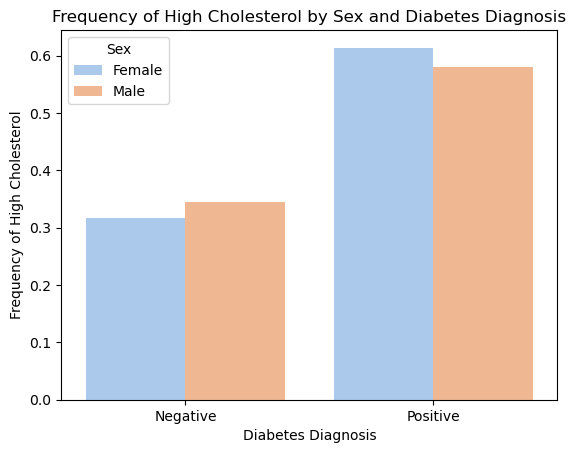

In [54]:
# Plotting a bar plot
sns.barplot(x='Diabetes', y='HighChol', hue='Sex', data=total_hc_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency of High Cholesterol')
plt.title('Frequency of High Cholesterol by Sex and Diabetes Diagnosis')

# Display the chart
plt.show()

In [21]:
#Calculate the frequency of High Cholesterol within each age range
age_chol = df_diabetes.groupby("Age")["HighChol"].mean().reset_index()
age_chol["Age"].replace({1.0 : '18-24', 
                         2.0 : '25-29', 
                         3.0 : '30-34', 
                         4.0 :'35-39', 
                         5.0 : '40-44', 
                         6.0 : '45-49', 
                         7.0 : '50-54', 
                         8.0 : '55-59', 
                         9.0 : '60-64', 
                         10.0 :'65-69', 
                         11.0 : '70-74', 
                         12.0 : '75-79', 
                         13.0 : 'Over 79'}, inplace = True)
age_chol

,Age,HighChol
0,18-24,0.102007
1,25-29,0.119550
2,30-34,0.164959
3,35-39,0.248151
4,40-44,0.274336
5,45-49,0.333333
6,50-54,0.431380
7,55-59,0.464014
8,60-64,0.525456
9,65-69,0.564626


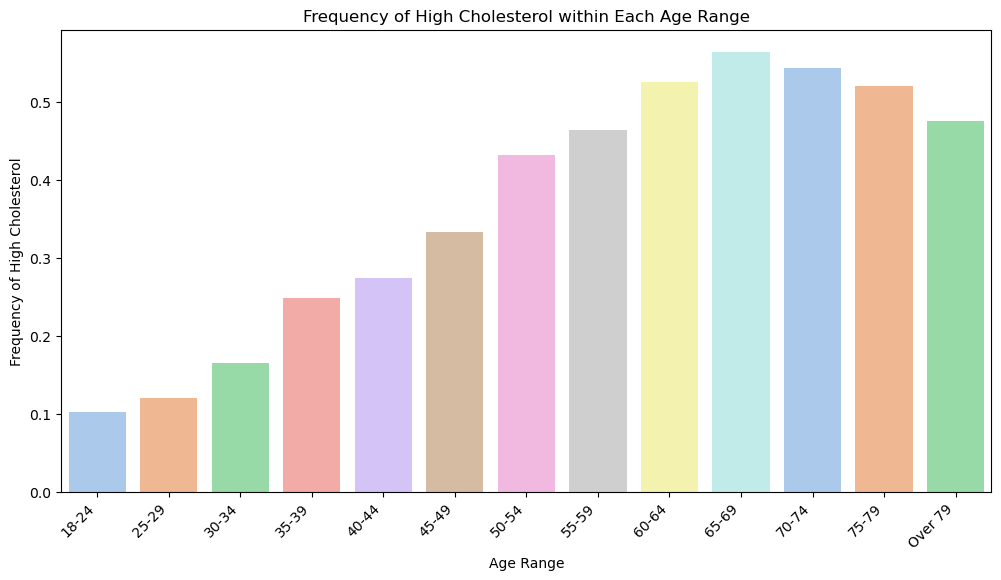

In [55]:
# Plotting a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='HighChol', data=age_chol, palette='pastel')

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Frequency of High Cholesterol')
plt.title('Frequency of High Cholesterol within Each Age Range')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [23]:
#Calculate the difference in cholesterol by age with regards to diabetes diagnosis
age_chol_d = df_diabetes.groupby(["Age", "Diabetes"])["HighChol"].mean().reset_index()
age_chol_d["Age"].replace({1.0 : '18-24', 
                         2.0 : '25-29', 
                         3.0 : '30-34', 
                         4.0 :'35-39', 
                         5.0 : '40-44', 
                         6.0 : '45-49', 
                         7.0 : '50-54', 
                         8.0 : '55-59', 
                         9.0 : '60-64', 
                         10.0 :'65-69', 
                         11.0 : '70-74', 
                         12.0 : '75-79', 
                         13.0 : 'Over 79'}, inplace = True)
age_chol_d                             

,Age,Diabetes,HighChol
0,18-24,Negative,0.090744
1,18-24,Positive,0.234043
2,25-29,Negative,0.102719
3,25-29,Positive,0.346939
4,30-34,Negative,0.136205
5,30-34,Positive,0.376068
6,35-39,Negative,0.190287
7,35-39,Positive,0.528846
8,40-44,Negative,0.211120
9,40-44,Positive,0.504399


/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_22067/3344710012.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Age', y='HighChol', hue='Diabetes', data=age_chol_d, ci='sd', markers='o', capsize=0.1)


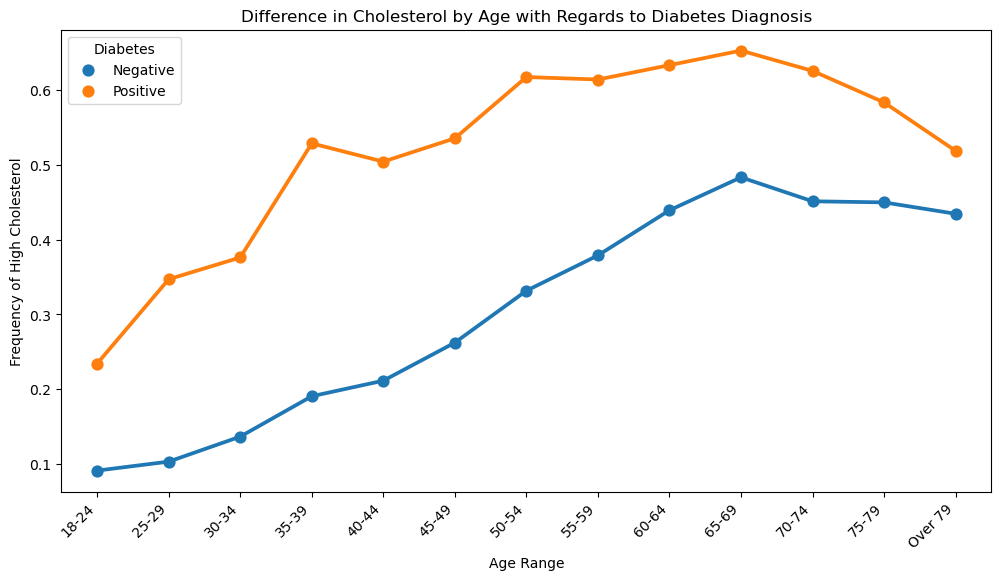

In [56]:
# Plotting a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age', y='HighChol', hue='Diabetes', data=age_chol_d, ci='sd', markers='o', capsize=0.1)

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Frequency of High Cholesterol')
plt.title('Difference in Cholesterol by Age with Regards to Diabetes Diagnosis')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [25]:
#Calculate the frequency of High Cholesterol within each income range
income_chol = df_diabetes.groupby("Income")["HighChol"].mean().reset_index()
income_chol["Income"].replace({1.0 : '<$9,999',
                               2.0 : '$10,000 < $14,999',
                               3.0 : '$15,000 < $19,999',
                               4.0 : '$20,000 < $24,999',
                               5.0 : '$25,000 < $34,999',
                               6.0 : '$35,000 < $49,999',
                               7.0 : '$50,000 < $74,999',
                               8.0 : '>$75,000'}, inplace = True)
                               
income_chol

,Income,HighChol
0,"<$9,999",0.472081
1,"$10,000 < $14,999",0.517516
2,"$15,000 < $19,999",0.491461
3,"$20,000 < $24,999",0.471161
4,"$25,000 < $34,999",0.445554
5,"$35,000 < $49,999",0.432990
6,"$50,000 < $74,999",0.441761
7,">$75,000",0.392885


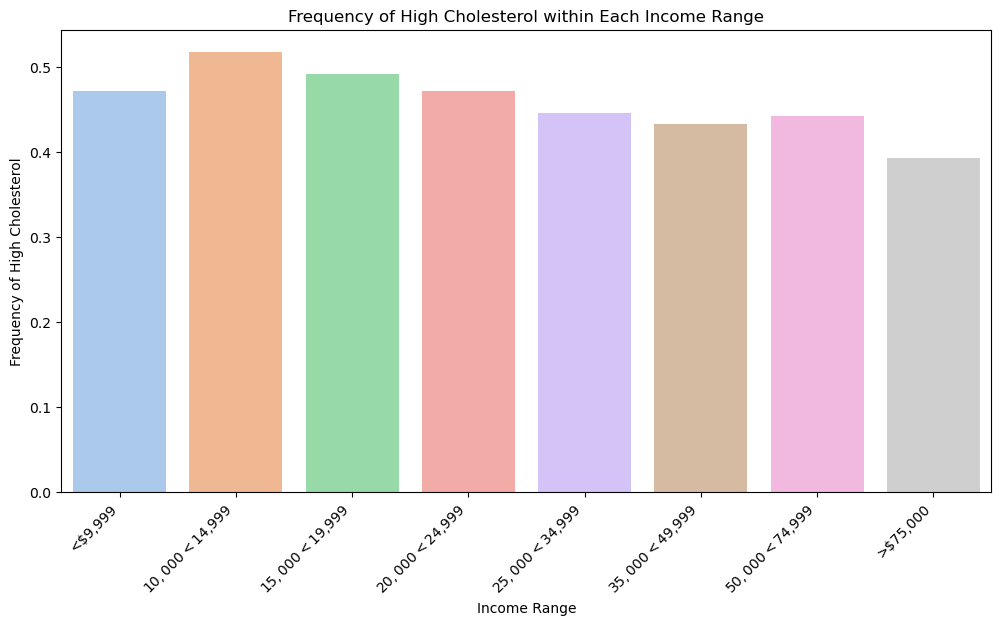

In [57]:
# Plotting a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Income', y='HighChol', data=income_chol, palette='pastel')

# Adding labels and title
plt.xlabel('Income Range')
plt.ylabel('Frequency of High Cholesterol')
plt.title('Frequency of High Cholesterol within Each Income Range')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [27]:
#Calculate the difference in cholesterol by income with regards to diabetes diagnosis
income_chol_d = df_diabetes.groupby(["Income", "Diabetes"])["HighChol"].mean().reset_index()
income_chol_d["Income"].replace({1.0 : '<$9,999',
                               2.0 : '$10,000 < $14,999',
                               3.0 : '$15,000 < $19,999',
                               4.0 : '$20,000 < $24,999',
                               5.0 : '$25,000 < $34,999',
                               6.0 : '$35,000 < $49,999',
                               7.0 : '$50,000 < $74,999',
                               8.0 : '>$75,000'}, inplace = True)
                               
income_chol_d

,Income,Diabetes,HighChol
0,"<$9,999",Negative,0.371711
1,"<$9,999",Positive,0.578397
2,"$10,000 < $14,999",Negative,0.350598
3,"$10,000 < $14,999",Positive,0.628647
4,"$15,000 < $19,999",Negative,0.350195
5,"$15,000 < $19,999",Positive,0.625926
6,"$20,000 < $24,999",Negative,0.333793
7,"$20,000 < $24,999",Positive,0.610644
8,"$25,000 < $34,999",Negative,0.342537
9,"$25,000 < $34,999",Positive,0.572034


/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_22067/4257596229.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Income', y='HighChol', hue='Diabetes', data=income_chol_d, ci='sd', markers='o', capsize=0.1)


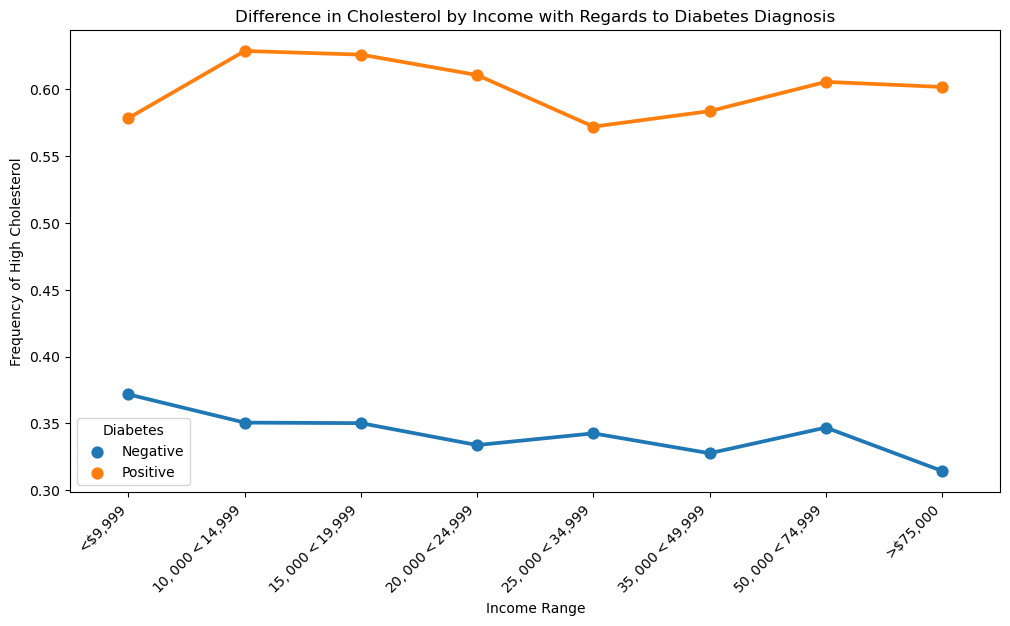

In [58]:
# Plotting a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Income', y='HighChol', hue='Diabetes', data=income_chol_d, ci='sd', markers='o', capsize=0.1)

# Adding labels and title
plt.xlabel('Income Range')
plt.ylabel('Frequency of High Cholesterol')
plt.title('Difference in Cholesterol by Income with Regards to Diabetes Diagnosis')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

# Blood Pressure Analysis

In [29]:
#Calculate total number of people with high blood pressure 
df_high_bp = df_diabetes.loc[(df_diabetes["HighBP"] == 1.0)]
print('The total number of people with high blood pressure is ' + str(len(df_high_bp)))
bp_pct = round(((len(df_high_bp)/len(df_diabetes)) * 100), 2)
print('That means ' + str(bp_pct) + '% of the population of the survey has high blood pressure')

The total number of people with high blood pressure is 10407
That means 43.93% of the population of the survey has high blood pressure


In [30]:
#Calculate the frequency of High Blood Pressure based off diabetes diagnosis
bp_mean = df_diabetes.groupby("Diabetes")["HighBP"].mean().reset_index()
bp_mean

,Diabetes,HighBP
0,Negative,0.299569
1,Positive,0.683728


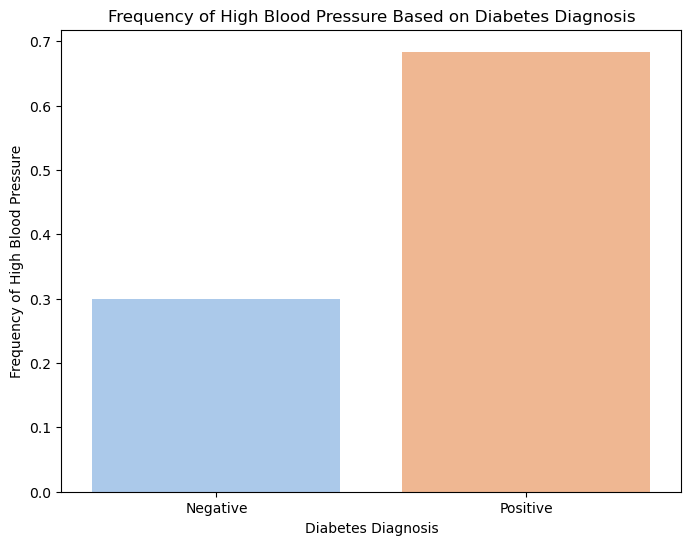

In [59]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes', y='HighBP', data=bp_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency of High Blood Pressure')
plt.title('Frequency of High Blood Pressure Based on Diabetes Diagnosis')

# Display the chart
plt.show()

In [32]:
#Calculate total number of people with high blood pressure by sex
df_high_bp = df_diabetes.loc[(df_diabetes["HighBP"] == 1.0)]
sex_counts = df_high_bp['Sex'].value_counts()
df_bp_sex = sex_counts.reset_index()
df_bp_sex.columns = ['Sex', 'People With High BP']
df_bp_sex   

,Sex,People With High BP
0,Female,5863
1,Male,4544


In [33]:
#Calculate which sex has a higher frequency of High Blood Pressure
df_hbp = df_diabetes.groupby("Sex")["HighBP"].mean().reset_index()
df_hbp.columns = ['Sex', 'Percentage of People With High BP']
df_hbp

,Sex,Percentage of People With High BP
0,Female,0.426617
1,Male,0.456775


In [34]:
#Calculate the frequency of High Blood Pressure in Females based off diabetes diagnosis
female_bp_mean = df_female.groupby('Diabetes')['HighBP'].mean().reset_index()
print('Frequency of High Blood Pressure in Females') 
female_bp_mean

Frequency of High Blood Pressure in Females


,Diabetes,HighBP
0,Negative,0.282764
1,Positive,0.695925


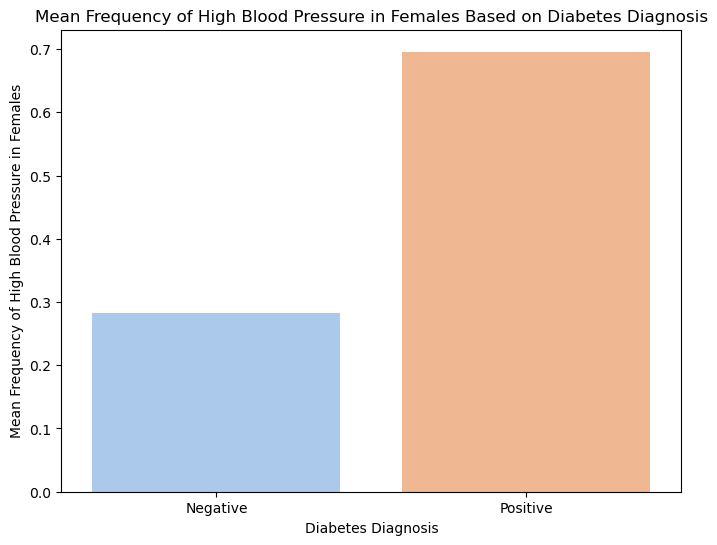

In [35]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes', y='HighBP', data=female_bp_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Mean Frequency of High Blood Pressure in Females')
plt.title('Mean Frequency of High Blood Pressure in Females Based on Diabetes Diagnosis')

# Display the chart
plt.show()

In [36]:
#Calculate the frequency of High Blood Pressure in Males based off diabetes diagnosis
Male_bp_mean = df_male.groupby('Diabetes')['HighBP'].mean().reset_index()
print('Frequency of High Blood Pressure in Males') 
Male_bp_mean

Frequency of High Blood Pressure in Males


,Diabetes,HighBP
0,Negative,0.324179
1,Positive,0.668494


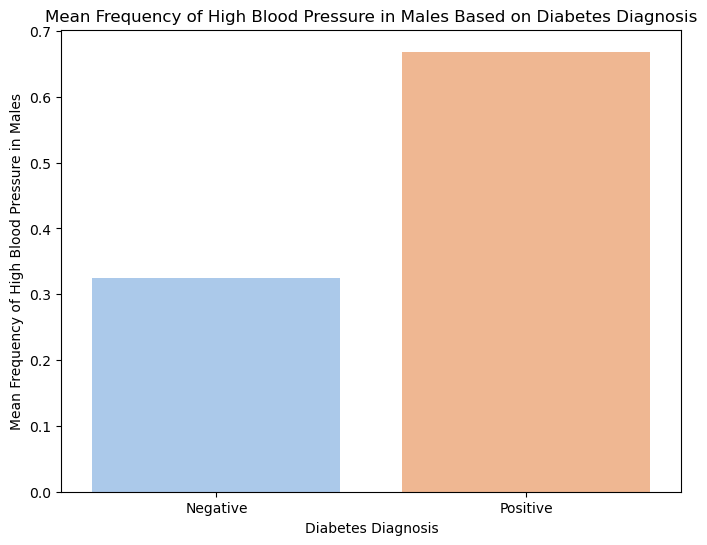

In [37]:
# Plotting a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes', y='HighBP', data=Male_bp_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Mean Frequency of High Blood Pressure in Males')
plt.title('Mean Frequency of High Blood Pressure in Males Based on Diabetes Diagnosis')

# Display the chart
plt.show()

In [38]:
#All Together
total_bp_mean = df_diabetes.groupby(["Sex", "Diabetes"])["HighBP"].mean().reset_index()
total_bp_mean

,Sex,Diabetes,HighBP
0,Female,Negative,0.282764
1,Female,Positive,0.695925
2,Male,Negative,0.324179
3,Male,Positive,0.668494


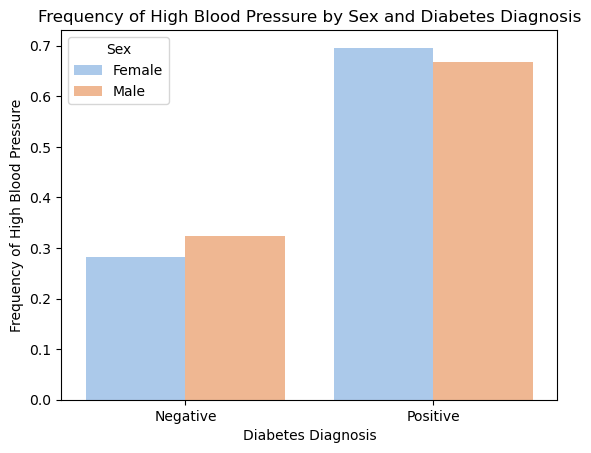

In [60]:
# Plotting a bar plot
sns.barplot(x='Diabetes', y='HighBP', hue='Sex', data=total_bp_mean, palette='pastel')

# Adding labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency of High Blood Pressure')
plt.title('Frequency of High Blood Pressure by Sex and Diabetes Diagnosis')

# Display the chart
plt.show()

In [40]:
#Calculate the frequency of High Blood Pressure within each age range
age_bp = df_diabetes.groupby("Age")["HighBP"].mean().reset_index()
age_bp["Age"].replace({1.0 : '18-24', 
                         2.0 : '25-29', 
                         3.0 : '30-34', 
                         4.0 :'35-39', 
                         5.0 : '40-44', 
                         6.0 : '45-49', 
                         7.0 : '50-54', 
                         8.0 : '55-59', 
                         9.0 : '60-64', 
                         10.0 :'65-69', 
                         11.0 : '70-74', 
                         12.0 : '75-79', 
                         13.0 : 'Over 79'}, inplace = True)
age_bp

,Age,HighBP
0,18-24,0.080268
1,25-29,0.118143
2,30-34,0.133197
3,35-39,0.194741
4,40-44,0.244627
5,45-49,0.286145
6,50-54,0.386276
7,55-59,0.457439
8,60-64,0.524199
9,65-69,0.597403


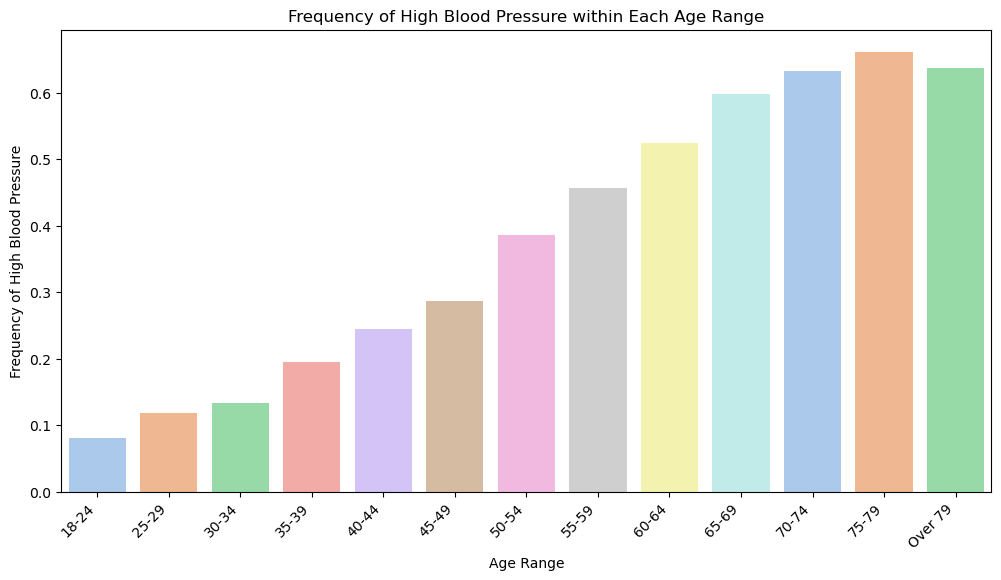

In [61]:
# Plotting a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='HighBP', data=age_bp, palette='pastel')

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Frequency of High Blood Pressure')
plt.title('Frequency of High Blood Pressure within Each Age Range')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [42]:
#Calculate the difference in blood pressure by age with regards to diabetes diagnosis
age_bp_d = df_diabetes.groupby(["Age", "Diabetes"])["HighBP"].mean().reset_index()
age_bp_d["Age"].replace({1.0 : '18-24', 
                         2.0 : '25-29', 
                         3.0 : '30-34', 
                         4.0 :'35-39', 
                         5.0 : '40-44', 
                         6.0 : '45-49', 
                         7.0 : '50-54', 
                         8.0 : '55-59', 
                         9.0 : '60-64', 
                         10.0 :'65-69', 
                         11.0 : '70-74', 
                         12.0 : '75-79', 
                         13.0 : 'Over 79'}, inplace = True)
age_bp_d                             

,Age,Diabetes,HighBP
0,18-24,Negative,0.070780
1,18-24,Positive,0.191489
2,25-29,Negative,0.107251
3,25-29,Positive,0.265306
4,30-34,Negative,0.110594
5,30-34,Positive,0.299145
6,35-39,Negative,0.133796
7,35-39,Positive,0.490385
8,40-44,Negative,0.172442
9,40-44,Positive,0.507331


/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_22067/3478175819.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Age', y='HighBP', hue='Diabetes', data=age_bp_d, ci='sd', markers='o', capsize=0.1)


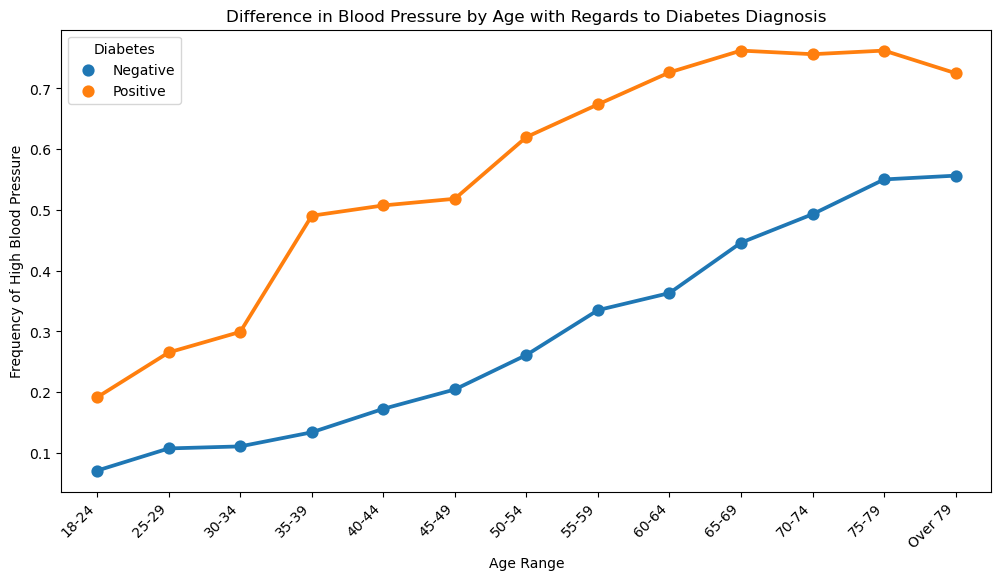

In [62]:
# Plotting a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age', y='HighBP', hue='Diabetes', data=age_bp_d, ci='sd', markers='o', capsize=0.1)

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Frequency of High Blood Pressure')
plt.title('Difference in Blood Pressure by Age with Regards to Diabetes Diagnosis')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [44]:
#Calculate the frequency of High Blood Pressure within each income range
income_bp = df_diabetes.groupby("Income")["HighBP"].mean().reset_index()
income_bp["Income"].replace({1.0 : '<$9,999',
                               2.0 : '$10,000 < $14,999',
                               3.0 : '$15,000 < $19,999',
                               4.0 : '$20,000 < $24,999',
                               5.0 : '$25,000 < $34,999',
                               6.0 : '$35,000 < $49,999',
                               7.0 : '$50,000 < $74,999',
                               8.0 : '>$75,000'}, inplace = True)
                               
income_bp

,Income,HighBP
0,"<$9,999",0.536379
1,"$10,000 < $14,999",0.595541
2,"$15,000 < $19,999",0.579696
3,"$20,000 < $24,999",0.558026
4,"$25,000 < $34,999",0.516405
5,"$35,000 < $49,999",0.492420
6,"$50,000 < $74,999",0.443567
7,">$75,000",0.357410


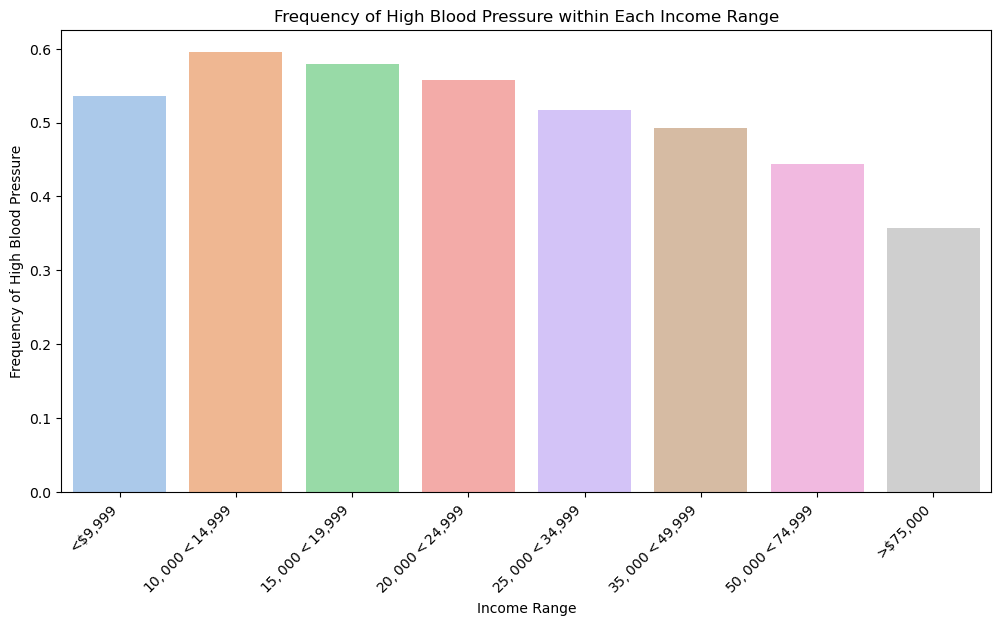

In [63]:
# Plotting a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Income', y='HighBP', data=income_bp, palette='pastel')

# Adding labels and title
plt.xlabel('Income Range')
plt.ylabel('Frequency of High Blood Pressure')
plt.title('Frequency of High Blood Pressure within Each Income Range')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [46]:
#Calculate the difference in blood pressure by income with regards to diabetes diagnosis
income_bp_d = df_diabetes.groupby(["Income", "Diabetes"])["HighBP"].mean().reset_index()
income_bp_d["Income"].replace({1.0 : '<$9,999',
                               2.0 : '$10,000 < $14,999',
                               3.0 : '$15,000 < $19,999',
                               4.0 : '$20,000 < $24,999',
                               5.0 : '$25,000 < $34,999',
                               6.0 : '$35,000 < $49,999',
                               7.0 : '$50,000 < $74,999',
                               8.0 : '>$75,000'}, inplace = True)
                               
income_bp_d

,Income,Diabetes,HighBP
0,"<$9,999",Negative,0.378289
1,"<$9,999",Positive,0.703833
2,"$10,000 < $14,999",Negative,0.378486
3,"$10,000 < $14,999",Positive,0.740053
4,"$15,000 < $19,999",Negative,0.416342
5,"$15,000 < $19,999",Positive,0.735185
6,"$20,000 < $24,999",Negative,0.368276
7,"$20,000 < $24,999",Positive,0.750700
8,"$25,000 < $34,999",Negative,0.369284
9,"$25,000 < $34,999",Positive,0.697034


/var/folders/qp/cryp6xxx017by8b4yxwh79tc0000gp/T/ipykernel_22067/254427853.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Income', y='HighBP', hue='Diabetes', data=income_bp_d, ci='sd', markers='o', capsize=0.1)


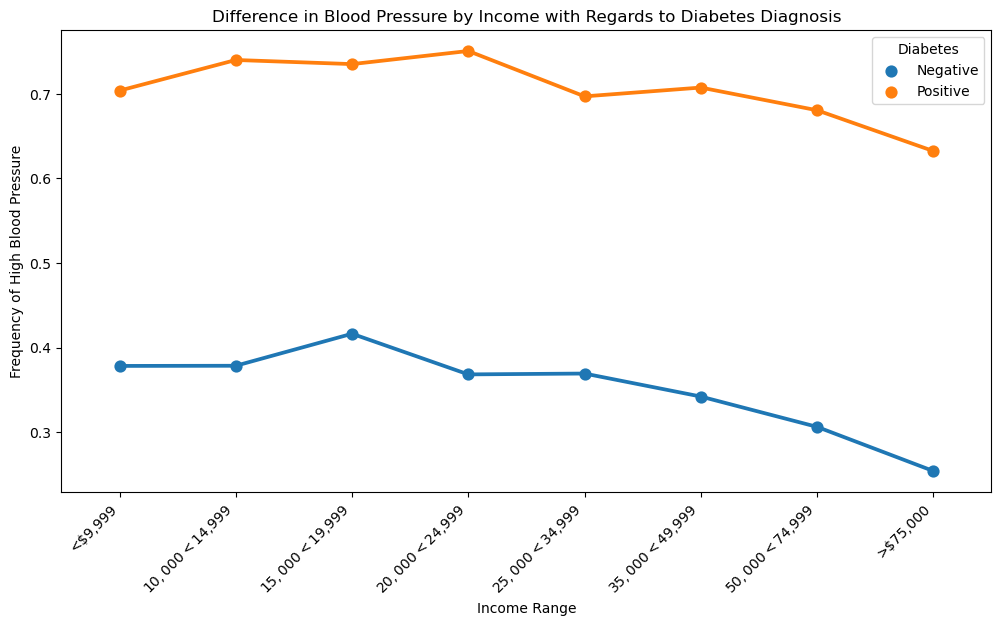

In [64]:
# Plotting a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='Income', y='HighBP', hue='Diabetes', data=income_bp_d, ci='sd', markers='o', capsize=0.1)

# Adding labels and title
plt.xlabel('Income Range')
plt.ylabel('Frequency of High Blood Pressure')
plt.title('Difference in Blood Pressure by Income with Regards to Diabetes Diagnosis')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()